# Using the Experiment class
This is intended to make it easier to create and manage experiments that use the ϕ calculator. An experiment is a network setup (cm,tpm) and calculation of ϕ for all reachable states.
For more info on using phial, see 
[the docs](https://htmlpreview.github.io/?https://github.com/pothiers/phial/blob/dev/build/index.html)

In [26]:
import phial.experiment as ws
import phial.toolbox  as tb
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

## Basic Create and Run an experiment
Results are returned in a dictionary that includes results for every ϕ calculation (state, phi, calc-time) as well as total time for the experiment. Plot histogram of phi values and graph of network.

Saved experiment with results to: foo/results_2020-05-15T18:34:15.869278.json
CPU times: user 793 ms, sys: 945 ms, total: 1.74 s
Wall time: 1.22 s


{'timestamp': '2020-05-15 18:34:14.659212',
 'duration': 1.0127430709835608,
 'results': {'111': {'phi': 0.375, 'elapsed_seconds': 0.22012456701486371},
  '001': {'phi': 0.125, 'elapsed_seconds': 0.20108217798406258},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.20481780701084062},
  '000': {'phi': 0.125, 'elapsed_seconds': 0.19192183500854298},
  '010': {'phi': 0.159722, 'elapsed_seconds': 0.19347325200214982}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

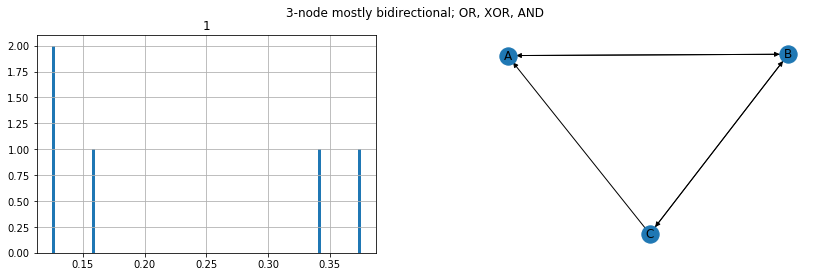

In [27]:
exp = Experiment(
    [('A', 'B'), # ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A='OR', B='AND', C='XOR'),
    saveDir='./foo',  # WS note: had to create foo dir: it didn't automatically create it
    title='3-node mostly bidirectional; OR, XOR, AND',  
    comment = 'from pyphi/examples.py',
)
%time exp.run(plot=True)

### Get a little more info

In [28]:
list(exp.net.state_cycles)

[[0], [7]]

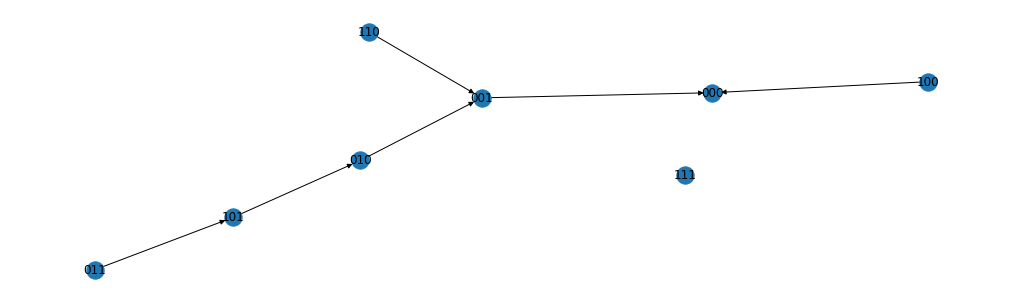

In [29]:
S = exp.net.draw_states()

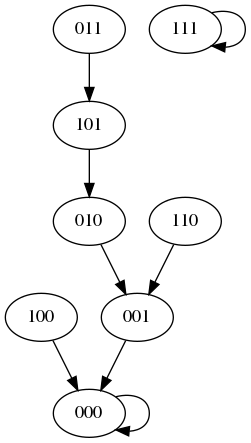

In [30]:
tb.dotgraph(S,'hifi-states.png')

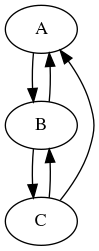

In [31]:
from IPython.display import Image
exp.net.gvgraph('hifi.png')
Image(filename='hifi.png')

### Plot again, but also include counts of unreachable states in historgram
For input-states that are not reachable (would cause phi-calc to fail), record as phi = -1

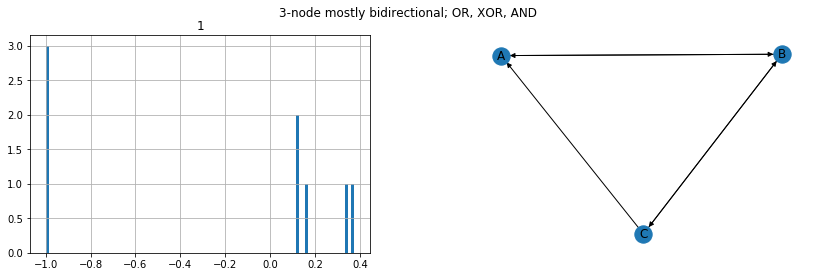

In [32]:
exp.analyze(countUnreachable=True)

## Assign node function from list of all possible functions
First find the maximum number of automatically generated functions available for each node given the current topology. Find which input states for a node will produce a 1 state for the node. (any others produce 0 state)

In [33]:
gnf = exp.get_num_funcs
gnf

{'A': 16, 'B': 16, 'C': 4}

In [50]:
# WS default for C (1 input) is copy: what is the default for a node with multiple inputs?
exp.gen_tpm(dict(A=8, B=3)) 

,A,B,C
000,0,0,0
100,0,1,0
010,1,0,0
110,1,1,0
001,1,0,1
101,1,0,1
011,0,0,0
111,0,0,1


In [35]:
exp.net.get_node('A').func.true_states

((0, 0), (1, 1))

#### Run with modified TPM

Saved experiment with results to: foo/funcs_AB.json
CPU times: user 987 ms, sys: 959 ms, total: 1.95 s
Wall time: 1.56 s


{'timestamp': '2020-05-15 18:34:17.336492',
 'duration': 1.3157610800117254,
 'results': {'111': {'phi': 0.1875, 'elapsed_seconds': 0.19460157898720354},
  '001': {'phi': 0.1875, 'elapsed_seconds': 0.2095536720007658},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.20481780701084062},
  '000': {'phi': 0.125, 'elapsed_seconds': 0.19192183500854298},
  '010': {'phi': 0.1875, 'elapsed_seconds': 0.22799660501186736},
  '110': {'phi': 2.145832, 'elapsed_seconds': 0.21257657901151106},
  '011': {'phi': 0.1875, 'elapsed_seconds': 0.23785292799584568},
  '100': {'phi': 1.0625, 'elapsed_seconds': 0.23194359699846245}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

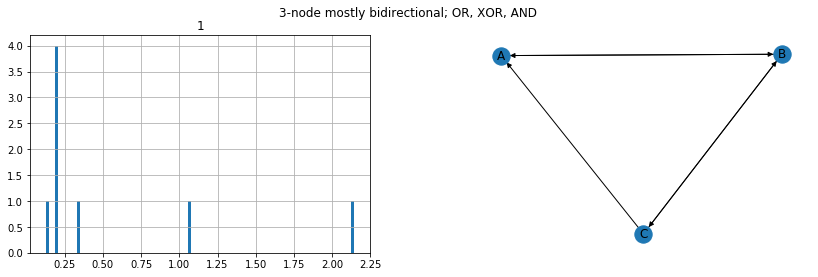

In [36]:
%time exp.run(plot=True,save='funcs_AB')

### Generate TPM where all nodes use function that only produces 0
Then run and see how different our results are. (answer: not all that much)

In [37]:
exp.gen_tpm(dict(A=0,B=0,C=0)) # node funcs never return 1

,A,B,C
000,0,0,0
100,0,0,0
010,0,0,0
110,0,0,0
001,0,0,0
101,0,0,0
011,0,0,0
111,0,0,0


In [38]:
exp.net.get_node('A').func.true_states  # Null set of possible inputs that yield 1

()

Saved experiment with results to: foo/results_2020-05-15T18:34:19.685882.json
CPU times: user 684 ms, sys: 536 ms, total: 1.22 s
Wall time: 351 ms


{'timestamp': '2020-05-15 18:34:19.346577',
 'duration': 0.1054990220000036,
 'results': {'111': {'phi': 0.1875, 'elapsed_seconds': 0.19460157898720354},
  '001': {'phi': 0.1875, 'elapsed_seconds': 0.2095536720007658},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.20481780701084062},
  '000': {'phi': 0.0, 'elapsed_seconds': 0.10313189300359227},
  '010': {'phi': 0.1875, 'elapsed_seconds': 0.22799660501186736},
  '110': {'phi': 2.145832, 'elapsed_seconds': 0.21257657901151106},
  '011': {'phi': 0.1875, 'elapsed_seconds': 0.23785292799584568},
  '100': {'phi': 1.0625, 'elapsed_seconds': 0.23194359699846245}},
 'connected_components': 1,
 'cycles': 1,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

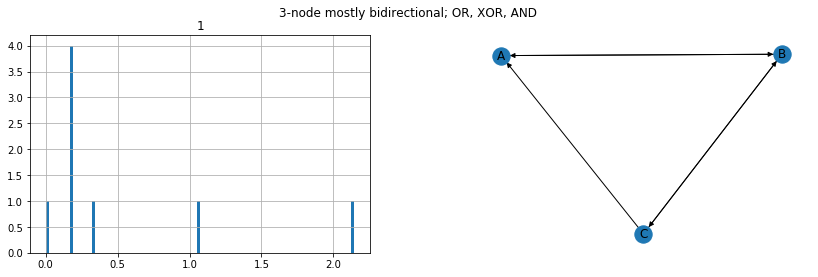

In [39]:
%time exp.run(plot=True)

## Get experiment info
Full info is returned by default when doing exp.run(). But here we get the max time and phi over all states.

In [40]:
dict(
    maxphi = max([ed['phi'] for ed in exp.info()['results'].values()]),
    maxsec = max([ed['elapsed_seconds'] for ed in exp.info()['results'].values()])
)

{'maxphi': 2.145832, 'maxsec': 0.23785292799584568}

## Install functions that just give random results
NOTE: the function is run to create the TPM.  Using the same TPM gives same results.  But if we recreate the TPM using the same functon we get different results.

In [41]:
import random
rndfunc = lambda inputs: random.choice([0,1])
rndfunc([1,0,1])

1

In [42]:
for n in exp.net.nodes:
    n.func=rndfunc
exp.gen_tpm({})

,A,B,C
000,0,1,0
100,1,1,0
010,0,1,1
110,1,1,1
001,1,0,0
101,1,0,0
011,0,0,0
111,1,0,0


### These runs produce the same result

Saved experiment with results to: foo/results_2020-05-15T18:34:21.580113.json


{'timestamp': '2020-05-15 18:34:20.126472',
 'duration': 1.2469423720031045,
 'results': {'111': {'phi': 0, 'elapsed_seconds': 0.2000392870104406},
  '001': {'phi': 0.1875, 'elapsed_seconds': 0.2095536720007658},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.20481780701084062},
  '000': {'phi': 0, 'elapsed_seconds': 0.2053578230261337},
  '010': {'phi': 0, 'elapsed_seconds': 0.22174607898341492},
  '110': {'phi': 0, 'elapsed_seconds': 0.2075318630086258},
  '011': {'phi': 0, 'elapsed_seconds': 0.21767833799822256},
  '100': {'phi': 0, 'elapsed_seconds': 0.19345852799597196}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

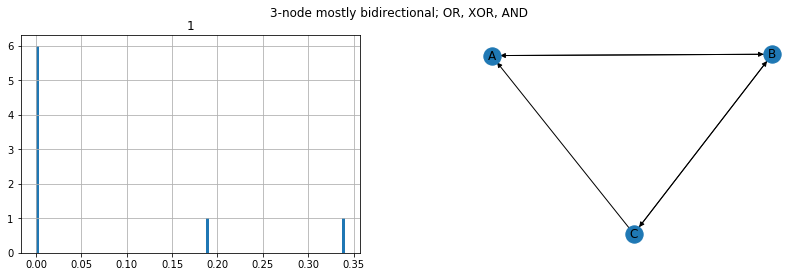

In [43]:
exp.run(plot=True)

Saved experiment with results to: foo/results_2020-05-15T18:34:23.399894.json


{'timestamp': '2020-05-15 18:34:21.957087',
 'duration': 1.235582894005347,
 'results': {'111': {'phi': 0, 'elapsed_seconds': 0.19408266100799665},
  '001': {'phi': 0.1875, 'elapsed_seconds': 0.2095536720007658},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.20481780701084062},
  '000': {'phi': 0, 'elapsed_seconds': 0.20701779800583608},
  '010': {'phi': 0, 'elapsed_seconds': 0.21535126099479385},
  '110': {'phi': 0, 'elapsed_seconds': 0.19780427098157816},
  '011': {'phi': 0, 'elapsed_seconds': 0.20642169800703414},
  '100': {'phi': 0, 'elapsed_seconds': 0.21271364099811763}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

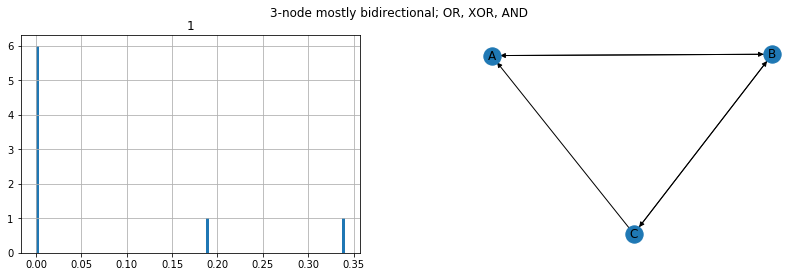

In [44]:
exp.run(plot=True)

### These runs produce the Different results

Saved experiment with results to: foo/results_2020-05-15T18:34:25.680701.json


{'timestamp': '2020-05-15 18:34:23.897432',
 'duration': 1.5671045490016695,
 'results': {'111': {'phi': 0.11632, 'elapsed_seconds': 0.22378027098602615},
  '001': {'phi': 0.1875, 'elapsed_seconds': 0.2095536720007658},
  '101': {'phi': 0.11632, 'elapsed_seconds': 0.19611989002441987},
  '000': {'phi': 0.239375, 'elapsed_seconds': 0.2461625350115355},
  '010': {'phi': 0.528125, 'elapsed_seconds': 0.21470422801212408},
  '110': {'phi': 0.456875, 'elapsed_seconds': 0.24511927299317904},
  '011': {'phi': 0.11632, 'elapsed_seconds': 0.23523777798982337},
  '100': {'phi': 0.239375, 'elapsed_seconds': 0.2047188619908411}},
 'connected_components': 1,
 'cycles': 1,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

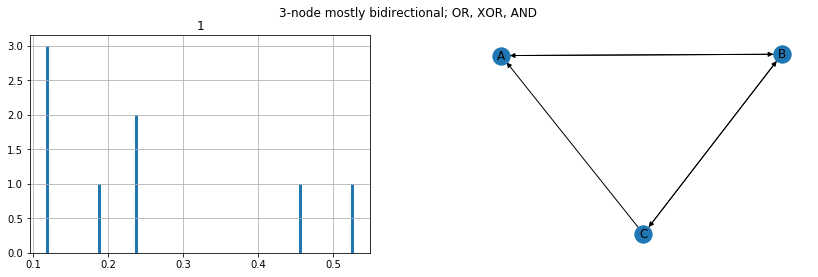

In [45]:
exp.gen_tpm({})
exp.run(plot=True)

Saved experiment with results to: foo/results_2020-05-15T18:34:27.183113.json


{'timestamp': '2020-05-15 18:34:26.066596',
 'duration': 0.8846834500145633,
 'results': {'111': {'phi': 0.014031, 'elapsed_seconds': 0.21536725500482135},
  '001': {'phi': 0.014031, 'elapsed_seconds': 0.21183098602341488},
  '101': {'phi': 0.11632, 'elapsed_seconds': 0.19611989002441987},
  '000': {'phi': 0.239375, 'elapsed_seconds': 0.2461625350115355},
  '010': {'phi': 0.046458, 'elapsed_seconds': 0.22694786300417036},
  '110': {'phi': 0.456875, 'elapsed_seconds': 0.24511927299317904},
  '011': {'phi': 0.014031, 'elapsed_seconds': 0.2294716240139678},
  '100': {'phi': 0.239375, 'elapsed_seconds': 0.2047188619908411}},
 'connected_components': 3,
 'cycles': 3,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

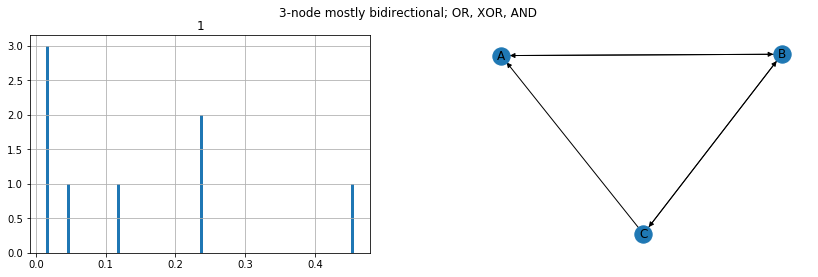

In [46]:
exp.gen_tpm({})
exp.run(plot=True)